#                                            Stock Analysis 

### <font color=#009999> We will be analyzing a particular stock "TESLA" based on its {Open, High, Low, and Volume}, We will be looking into the past 10 years performance to predict the direction of the stock, by using stock price over time and moving averages [200ma, 100ma, and 50ma]  which is utilized as trend indicators to identify significant support and resistance levels</font>



__We start first by importing all the dependencies and packages__

**To run this project you will need all of**:
*
Pandas, Pandas-datareader, matplotlib*

In [20]:
import numpy as np
import csv
import mpl_finance
import sqlite3
import time
import random
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')

ModuleNotFoundError: No module named 'matplotlib.mpl_finance'

**Let start by connecting to our database, ( this database doesn't exist but SQLite will automaticly create it for us ) and we will also create a variable and assigne it to our cursor** 

In [12]:
conn = sqlite3.connect('stock_price.db')
c = conn.cursor()

** First things first, we will read out of our csv file to see what kind of data we have, and how can we use it before we start manipulating it**
* we are going to use pandas to print out the head of our dataFrame

In [11]:
def read_csv():
    df = pd.read_csv('tesla.csv', parse_dates=True, index_col=0)
    print(df.head())

read_csv()



             Open   High    Low  Close    Volume
Date                                            
2010-06-29  19.00  25.00  17.54  23.89  18783276
2010-06-30  25.79  30.42  23.30  23.83  17194394
2010-07-01  25.00  25.92  20.27  21.96   8229863
2010-07-02  23.00  23.10  18.71  19.20   5141807
2010-07-06  20.00  20.00  15.83  16.11   6879296


**Now let try to create our database and load it with the data we have stored in the CSV file**
* We will use pandas to create a dataframe that reads from the CSV file and stores that sql into our database, and again if our database doesn't exist which it doesn't, then a database will be generated in the process, but even if it does, it will be erased and replaced with data from the CSV file.*


In [13]:
def create_database():
    df = pd.read_csv('tesla.csv', parse_dates=True, index_col=0)
    df.to_sql('stock_price.db', conn, if_exists='replace', index=False)
    conn.commit()
    
create_database()

**And now that we have a database let try and read from it**

* We use pandas again to Read SQL query into a DataFrame and print the head to verify that our database is populated



In [14]:
def read_from_db():
    df = pd.read_sql_query("SELECT * from 'stock_price.db'", conn)
    print(df.head())
    
read_from_db()

    Open   High    Low  Close    Volume
0  19.00  25.00  17.54  23.89  18783276
1  25.79  30.42  23.30  23.83  17194394
2  25.00  25.92  20.27  21.96   8229863
3  23.00  23.10  18.71  19.20   5141807
4  20.00  20.00  15.83  16.11   6879296


#### Finally we will graph this data into a beautiful Chart
* We read from the database one more time and use matplotlib library to show us the price movement, the moving averages, and the volume.
* We will also close our connection to the tadabase.


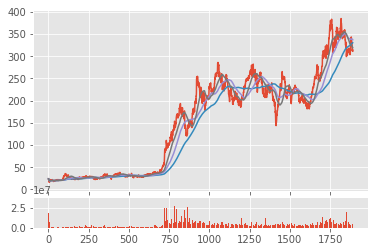

In [15]:
def graph_data():
    df = pd.read_sql_query("SELECT * from 'stock_price.db'", conn)
    df['100ma'] = df['Close'].rolling(window=100, min_periods=0).mean()
    df['200ma'] = df['Close'].rolling(window=200, min_periods=0).mean()
    df['50ma'] = df['Close'].rolling(window=50, min_periods=0).mean()
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
    ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
    ax1.plot(df.index, df['Close'])
    ax1.plot(df.index, df['200ma'])
    ax1.plot(df.index, df['100ma'])
    ax1.plot(df.index, df['50ma'])
    ax2.bar(df.index, df['Volume'])
    plt.show()

graph_data()
c.close()
conn.close()

**This time we will read directly from the CSV file and resample the data into a 10 days candlesticks.**

* Candlesticks are very important to determine price movement and bullish bearish sentiment. They also help us understand the direction of the stock in the short term, day and pattern traders depend on candlesticks to make a quick profit



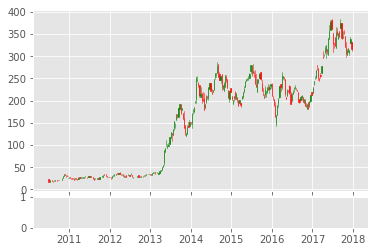

In [24]:
def graph_data2():
    df = pd.read_csv('tesla.csv', parse_dates=True, index_col=0)
    df_ohlc = df['Close'].resample('10D').ohlc()
    df_ohlc.reset_index(inplace=True)
    df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
    ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
    ax1.xaxis_date()
    candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
    plt.show()
    
graph_data2()


### This project is far from being completed, We will next look into the whole market such “NASDAQ” or “S&P 500” price movement and link that price movement into the media and politics  “especially the administrative branch”